<a href="https://colab.research.google.com/github/Travoltah/Zimbabwe-MNOs-Sentiment-Analysis/blob/main/2_Eco_t_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econet Customer Service Sentiment Analysis

This is a continuation from the previous notebook. The previous notebook was about cleaning the data. This one is about analysis. Let's list our objectives again to keep within our scope of the project.

## Primary Objective:
 - A time series analysis of how the frequency of complaints on service has changed over the last 9 years.

## Other Objectives:
 - Which month does Econet experience the most complaints?
 - Which type of complaint is most prevalent? How do these complaint categories change over time?
 - How often do customers complain that their enquiries are being ignored?
 - Which Econet SBU experiences the most customer complaints?
 - Is there a certain cluster/segment of Econet's customers that experience poor service the most?
 - Has there been a change in the percentage of complaints that Econet gets as its market share has changed over the years?
 - How does Econet's customer service compare to it's competitors?

Let's import relevant packages.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
data = pd.read_csv('/Users/mac/Desktop/Data Science/Projects/EconetSentimentAnalysis-master/EconetSentimentAnalysis/data_clean_main.csv', index_col=0)

In [ ]:
data.tail()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment
created_at,,,,,,,,,,
2014-09-05 10:12:05,14,1,9,Thank you @EdmondMariga Bank details are Caper...,HigherLifeFDN,thank you edmondmariga details are capernaum...,"['thank', 'you', 'edmondmariga', 'bank', 'deta...",e,True,pos
2014-08-18 10:16:47,1,0,6,#Zimbabwe's Econet bought Steward Bank for a b...,neildrewitt,# s econet bought steward for a ing license t...,"['#zimbabwe', 's', 'econet', 'bought', 'stewar...",e,True,pos
2014-04-02 11:30:21,1,0,2,@EcoCashZW @stewardbank Thank you,jacksonmadzimba,ecocashzw steward thank you,"['ecocashzw', 'stewardbank', 'thank', 'you']",e,True,pos
2013-12-10 13:17:26,0,0,2,"""@econet_support: What about #Twitter bundles?...",Itskarizma,econet support what about # s if you want...,"['econet', 'support', 'what', 'about', '#', 'b...",e,True,pos
2013-07-02 06:39:57,3,0,8,Econet supporting ordinary folk & their busine...,MuzindaHub,econet supporting ordinary folk their busine...,"['econet', 'supporting', 'ordinary', 'folk', '...",e,True,pos


In [ ]:
dat_drop = data[data['user_screen_name'].str.contains('jacksonmadzimba|MuzindaHub|HigherLifeFDN|neildrewitt', regex=True)]

In [ ]:
data.drop(dat_drop.index, inplace=True)

In [ ]:
data.index = pd.to_datetime(data.index)

### Customer complaints/enquiries by MNO

Let's begin by categorizing our data into respective MNOs.

In [ ]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]

In [ ]:
print('Econet has {} enquiries/complaints betweend Dec 2013 and March 2019'.format(data_econet.shape[0]))

Econet has 2133 enquiries/complaints betweend Dec 2013 and March 2019


In [ ]:
data_comp = data[data['MNO_label']=='c']

In [ ]:
print("Econet's competitors have a combined {} complaints/enquiries within the same period".format(data_comp.shape[0]))

Econet's competitors have a combined 477 complaints/enquiries within the same period


### Visualizing the data

Let's plot a daily time series of the customer enquiries over the years for Econet and its competitors.

First, we need to add an 'enquiry_count' column to our data which we can aggregate over.

In [ ]:
data.shape[0]

2610

In [ ]:
count_array = np.full(2610, 1)

In [ ]:
data['enquiry_count'] = count_array

Let's update our MNO dataframes.

In [ ]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]
data_comp = data[data['MNO_label']=='c']

In [ ]:
sns.set(rc={'figure.figsize':(12, 5)})

In [ ]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [ ]:
data_econet.sort_index(inplace=True)
data_comp.sort_index(inplace=True)

In [ ]:
data_econet.tail(1)

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2019-03-26 17:02:22,1,1,1,was using econet twtter..ndaa paden manje n th...,Luke_Snow69,was using econet twtter ndaa paden manje n th...,"['was', 'using', 'econet', 'twtter', 'ndaa', '...",e,True,neutral,1


In [ ]:
data_econet_monthly = data_econet[['enquiry_count']].resample("M").sum()

In [ ]:
data_econet_monthly.head()

,enquiry_count
created_at,
2012-02-29,22
2012-03-31,5
2012-04-30,7
2012-05-31,10
2012-06-30,2


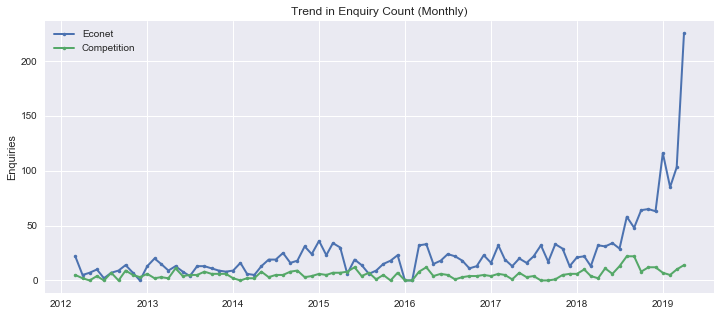

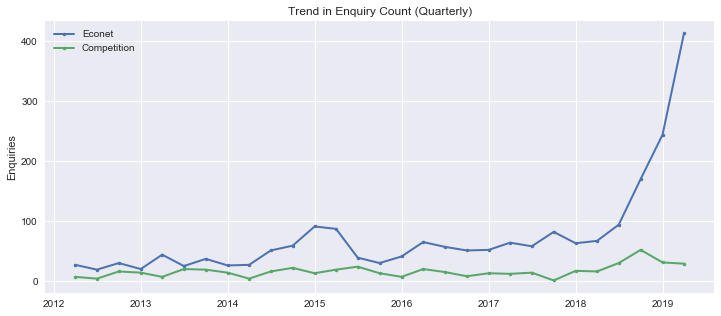

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(data_econet['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax1.set_ylabel("Enquiries")
ax1.set_title("Trend in Enquiry Count (Monthly)")
ax1.plot(data_comp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(data_econet['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax2.set_ylabel("Enquiries")
ax2.set_title("Trend in Enquiry Count (Quarterly)")
ax2.plot(data_comp['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax2.legend()

plt.grid(which='minor', axis='both')

 - The trend in both aggregations of by month and by quarter show that the enquiries are mostly average from 2012 to the first quarter of 2014.
 - From then on, there's a steady rise to 2015. The numbers take a sharp dip after the first quarter of 2015 then stabilize until the second quarter of 2018.
 - From here, the numbers rise sharply, very suddenly through to 2019.

Let's investigate Why there are so much complaints from June 2018 onwards.

In [ ]:
print(data_econet.loc['2018-06':].shape[0])
data_econet.loc['2018-06':].head()

856


,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2018-06-01 17:05:07,29,12,11,ECONET Wireless Zimbabwe Limited (EWZL) has re...,NewsDayZimbabwe,econet limited ewzl has registered a near ...,"['econet', 'wireless', 'zimbabwe', 'limited', ...",e,True,neutral,1
2018-06-02 22:50:20,20,5,9,"Kwese TV, a unit of Econet Media, has created ...",bustoptv,kwese tv a unit of econet has created ...,"['kwese', 'tv', 'a', 'unit', 'of', 'econet', '...",e,True,neutral,1
2018-06-03 17:08:16,16,2,11,Barclays Bank profits - 83%; Old Mutual 139%; ...,GwisaiMunya,barclays profits old mutual econ...,"['barclays', 'bank', 'profits', 'old', 'mutual...",e,True,neutral,1
2018-06-05 16:10:15,97,23,17,I was just talking to a 22 year old who didn’t...,T1mbles,i was just talking to a year old who didn t...,"['i', 'was', 'just', 'talking', 'to', 'a', 'ye...",e,True,neg,1
2018-06-06 12:17:42,21,2,18,"View your Call Records, monitor your Data Usag...",buzy263,view your call records monitor your data usag...,"['view', 'your', 'call', 'records', 'monitor',...",e,True,pos,1


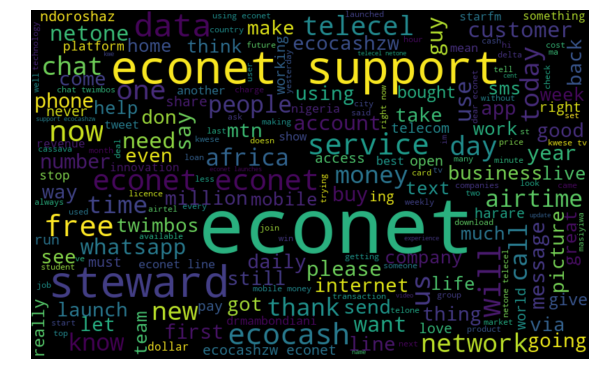

In [ ]:
all_words = ' '.join([text for text in data_econet['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud above has a lot of words in it. Let's list the ones that are most likely to be considered enquiries.
 - threats to switch to a competitor (telecel or netone)
 - steward bank
 - whatsapp
 - data
 - ecocash
 - service
 - kwese
 - network

Let's see how frequently these words occur.

In [ ]:
def word_extract(x):
    words = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"steward|whatsapp|data|ecocash|data|service|service|kwese|network", i)
        words.append(ht)

    return words

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

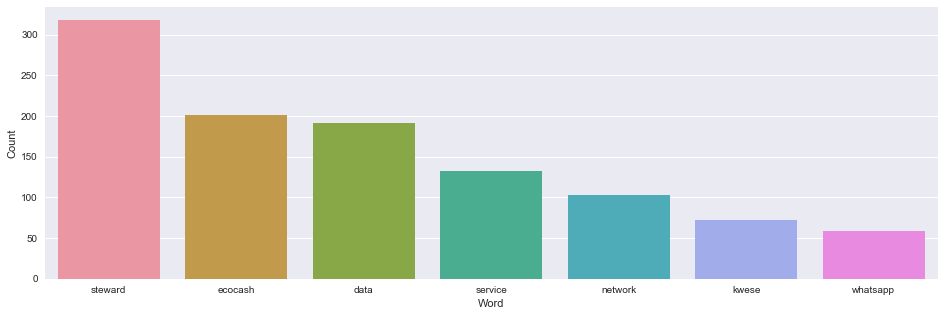

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Let's clean our data of rows that contain the term steward.

In [ ]:
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

In [ ]:
dat_steward = dat_steward[dat_steward['sentiment']=='pos']

In [ ]:
data_econet.drop(dat_steward.index, inplace=True)

In [ ]:
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

In [ ]:
dat_steward = dat_steward[dat_steward['sentiment']=='neutral']

In [ ]:
data_econet.drop(dat_steward.index, inplace=True)

In [ ]:
data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)].shape[0]

40

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

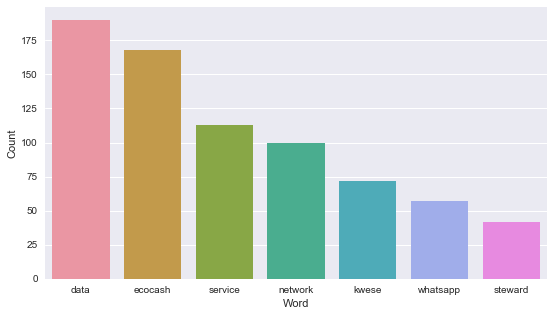

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2012-02-15 13:43:00,1,0,0,"A case study for EcoCash, Net*One and Telecel ...",nqabamatshazi,a case study for ecocash net one and telecel,"['a', 'case', 'study', 'for', 'ecocash', 'net'...",e,True,neutral,1
2012-03-12 11:26:23,0,2,2,#Zimbabwe: #Econet has signed up 1m users to i...,BalancingActAfr,# #econet has signed up m users to its m mon...,"['#zimbabwe', '#econet', 'has', 'signed', 'up'...",e,True,neg,1
2012-10-26 09:30:47,0,0,1,Econet interim results: US $78 million in afte...,Techzim,econet interim results us million in afte...,"['econet', 'interim', 'results', 'us', 'millio...",e,True,neutral,1
2012-12-17 14:28:16,0,1,7,So #Ecocash is making waves. When will Telecel...,SimbaMhuriro,so #ecocash is making waves when will telecel...,"['so', '#ecocash', 'is', 'making', 'waves', 'w...",e,True,neutral,1
2013-01-14 23:09:44,2,0,4,ECOCASH CREATES 5 000 NEW JOBS IN ZIMBABWE: E...,Newsdzezimbabwe,ecocash creates new jobs in econet ...,"['ecocash', 'creates', 'new', 'jobs', 'in', 'z...",e,True,neutral,1


Ecocash was introduced in 2012. It stands to reason that in the beginning, there were not much complaints. Let's remove all ecocash related tweets from 2012 to 2014.

In [ ]:
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)]

In [ ]:
dat_ecocash = dat_ecocash[dat_ecocash['sentiment']=='neutral']

In [ ]:
dat_ecocash = dat_ecocash.loc['2012':'2014']

In [ ]:
data_econet.drop(dat_ecocash.index, inplace=True)

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

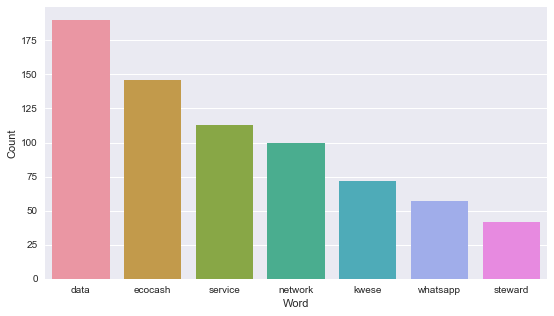

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2012-03-12 11:26:23,0,2,2,#Zimbabwe: #Econet has signed up 1m users to i...,BalancingActAfr,# #econet has signed up m users to its m mon...,"['#zimbabwe', '#econet', 'has', 'signed', 'up'...",e,True,neg,1
2012-04-22 17:03:06,0,0,4,#RememberWhen MTN &Econet were the only servic...,piktcha_purfekt,#rememberwhen mtn econet were the only servic...,"['#rememberwhen', 'mtn', 'econet', 'were', 'th...",e,True,neg,1
2012-07-13 07:49:37,0,0,2,Zimbabwe's Econet Wireless could become the co...,Ejiro_,s econet could become the country s largest ...,"['zimbabwe', 's', 'econet', 'wireless', 'could...",e,True,neutral,1
2012-08-05 19:21:01,13,1,134,This Day in History: 2001 - GSM service came i...,AscologyNews,this day in history gsm service came i...,"['this', 'day', 'in', 'history', 'gsm', 'servi...",e,True,neutral,1
2013-02-16 19:26:41,0,1,4,"Mtn in unical is also thrash""@gbagaunfreak: Ec...",princevigho,mtn in unical is also thrash gbagaunfreak ec...,"['mtn', 'in', 'unical', 'is', 'also', 'thrash'...",e,True,neg,1


In [ ]:
dat_ser = data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)]

In [ ]:
dat_ser = dat_ser[dat_ser['sentiment']=='neutral']

In [ ]:
dat_ser = dat_ser.loc['2012':'2014']

In [ ]:
data_econet.drop(dat_ser.index, inplace=True)

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

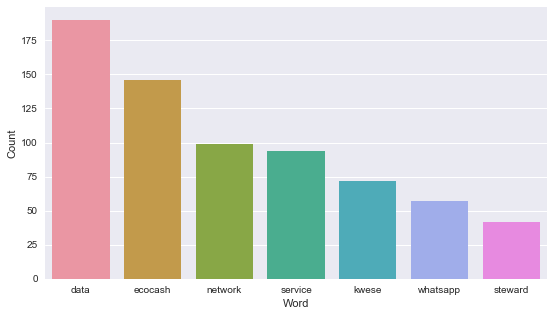

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
dat_net = data_econet[data_econet['tidy_tweet'].str.contains('network', regex=True)]

In [ ]:
dat_net = dat_net[dat_net['sentiment']=='neutral']

In [ ]:
dat_net = dat_net.loc['2012':'2014-11']

In [ ]:
data_econet.drop(dat_net.index, inplace=True)

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

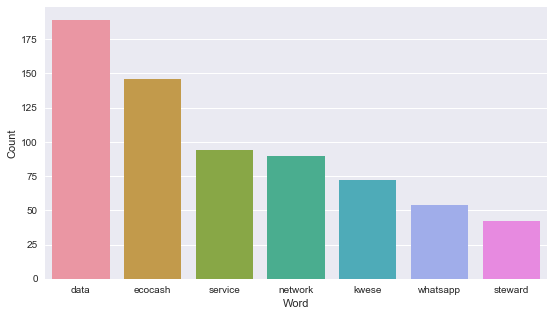

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
data_econet[data_econet['tidy_tweet'].str.contains('kwese', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2016-03-17 11:32:20,4,0,2,Econet Acquires Premier League Rights Deal htt...,TCwamambo,econet acquires premier league rights deal v...,"['econet', 'acquires', 'premier', 'league', 'r...",e,True,neutral,1
2016-03-24 14:18:32,11,1,12,#Twimbos @Econet hired this former @MultiChoic...,Techzim,#twimbos econet hired this former multichoic...,"['#twimbos', 'econet', 'hired', 'this', 'forme...",e,True,neutral,1
2016-08-11 14:08:34,7,0,8,#KweseFreeSports Econet Media team having a li...,xtremeafrica,#kwesefreesports econet team having a light m...,"['#kwesefreesports', 'econet', 'media', 'team'...",e,True,neutral,1
2016-09-01 07:11:47,12,16,41,Charamba orders ZBC to cancel deal with Econet...,ZimMediaReview,charamba orders zbc to cancel deal with econet...,"['charamba', 'orders', 'zbc', 'to', 'cancel', ...",e,True,neutral,1
2016-09-26 08:42:29,4,0,3,[ADVERTISEMENT]: Econet Media ventures into #R...,NewTimesRwanda,advertisement econet ventures into #rwanda...,"['advertisement', 'econet', 'media', 'ventures...",e,True,neutral,1


A big majority of the kwese tweets do not seem to be related to enquiries or complaints at all. Let's delete them.

In [ ]:
dat_kwese = data_econet[data_econet['tidy_tweet'].str.contains('kwese', regex=True)]

In [ ]:
data_econet.drop(dat_kwese.index, inplace=True)

In [ ]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

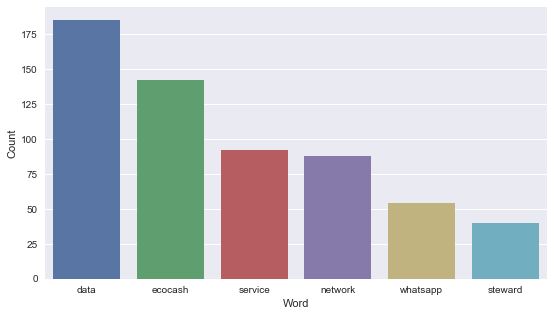

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
data_econet[data_econet['tidy_tweet'].str.contains('whatsapp', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2013-09-30 08:32:01,0,9,3,Today we need to get a dedicated line for #263...,263Chat,today we need to get a dedicated line for # ...,"['today', 'we', 'need', 'to', 'get', 'a', 'ded...",ec,True,neutral,1
2014-07-07 14:12:55,1,0,3,WhatsAppening in Zimbabwe? One operator is lea...,Sandvine,whatsappening in one operator is learning ho...,"['whatsappening', 'in', 'zimbabwe', 'one', 'op...",e,True,neutral,1
2014-08-18 06:15:01,2,0,7,Know what Econet should just give us? One Soci...,TadiwaNM,know what econet should just give us one soci...,"['know', 'what', 'econet', 'should', 'just', '...",e,True,neg,1
2014-10-07 08:42:54,2,2,4,Hey Econet! My whatsapp bundles were supposed ...,luvjiz52,hey econet my whatsapp s were supposed to exp...,"['hey', 'econet', 'my', 'whatsapp', 'bundles',...",e,True,neg,1
2014-10-27 18:42:21,1,0,0,"Logged on to find tweets about Whatsapp music,...",DannythatGuy,logged on to find tweets about whatsapp music ...,"['logged', 'on', 'to', 'find', 'tweets', 'abou...",e,True,neg,1


The whatsapp subset seems to have very little noise. We will leave it like that.

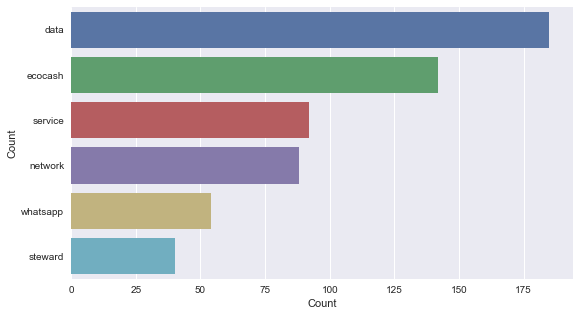

In [ ]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Count", y = "Word", orient="h")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(12, 5)})

In [ ]:
d

,Word,Count
2,data,185
1,ecocash,142
0,service,92
3,network,88
4,whatsapp,54
5,steward,40


In [ ]:
sum_count = sum(d['Count'])

In [ ]:
d['Percentage'] = (d['Count']/sum_count)*100

In [ ]:
d

,Word,Count,Percentage
2,data,185,30.782030
1,ecocash,142,23.627288
0,service,92,15.307820
3,network,88,14.642263
4,whatsapp,54,8.985025
5,steward,40,6.655574


In [ ]:
d['Percentage'] = d['Percentage'].apply(round)

In [ ]:
d

,Word,Count,Percentage
2,data,185,31
1,ecocash,142,24
0,service,92,15
3,network,88,15
4,whatsapp,54,9
5,steward,40,7


In [ ]:
d.at[3, 'Percentage'] = 14

In [ ]:
d

,Word,Count,Percentage
2,data,185,31
1,ecocash,142,24
0,service,92,15
3,network,88,14
4,whatsapp,54,9
5,steward,40,7


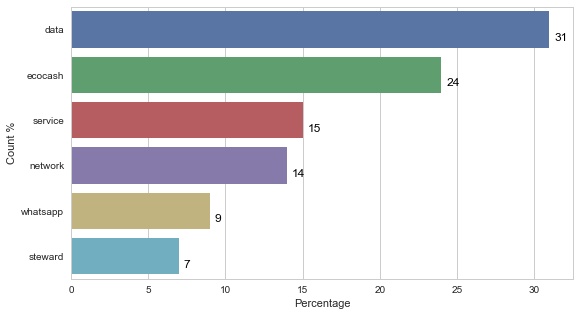

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Percentage", y = "Word", orient="h")
ax.set(ylabel = 'Count %')

for i, v in enumerate(d['Percentage']):
    ax.text(v + 0.3, i + .25, str(v), color='black')

plt.show()

The bar plot above shows the distribution of complaint/enquiry categories since Feb 2012 to March 2019.

Let's see the behavior of these complaints over the 7 years.

In [ ]:
dat_data = data_econet[data_econet['tidy_tweet'].str.contains('data', regex=True)]
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)]
dat_service = data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)]
dat_network = data_econet[data_econet['tidy_tweet'].str.contains('network', regex=True)]
dat_whatsapp = data_econet[data_econet['tidy_tweet'].str.contains('whatsapp', regex=True)]
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

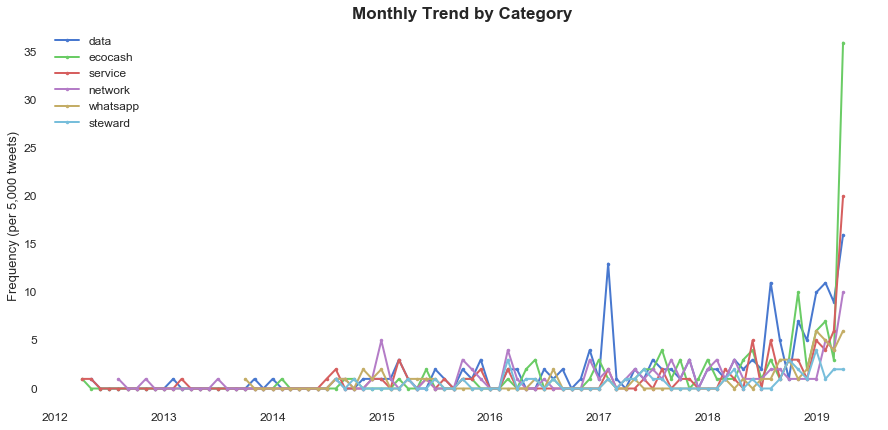

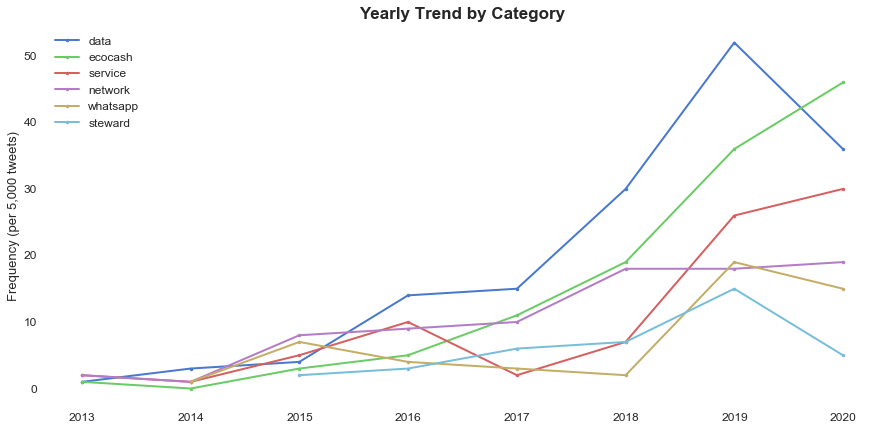

In [ ]:
sns.set_style("white")
sns.set_palette("muted")

fig1, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(dat_data['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="data")

ax1.set_ylabel("Frequency (per 5,000 tweets)", fontsize=13)
ax1.set_title("Monthly Trend by Category", fontsize=17, fontweight="bold")

ax1.plot(dat_ecocash['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="ecocash")
ax1.plot(dat_service['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="service")
ax1.plot(dat_network['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="network")
ax1.plot(dat_whatsapp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="whatsapp")
ax1.plot(dat_steward['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="steward")
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)

sns.set_palette("muted")
fig2, ax2 = plt.subplots(figsize=(15,7))

ax2.plot(dat_data['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="data")

ax2.set_ylabel("Frequency (per 5,000 tweets)", fontsize=13)
ax2.set_title("Yearly Trend by Category", fontsize=17, fontweight="bold")

ax2.plot(dat_ecocash['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="ecocash")
ax2.plot(dat_service['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="service")
ax2.plot(dat_network['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="network")
ax2.plot(dat_whatsapp['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="whatsapp")
ax2.plot(dat_steward['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="steward")
ax2.legend(fontsize=12)
ax2.tick_params(labelsize=12)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax1)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax2)

The time series above gives us some very interesting insights.
 - For instance, we can see that Econet started to get considerable enquiries from mid 2014 onwards.
 - From the yearly time series, we can see that the most prevalent complaint at the close of 2014 was network. This was mostly attributed to the last month of 2014, December. This is where network problems were at their peak in that year.
 - Network doesn't change significantly the following year but there are major upshoots in the service and data categories. Service at least doubles in quantity while data quadruples at the close of 2015. Unlike network in 2014, service and data complaints are more spread out throughout the year.
 - There's a drop in service complaints and whatsapp as well at the end of 2016. The latter has been on a steady decrease 2014. There are no changes in data and network, but a sharp increase in ecocash is observed. Ecocash complaints peak in May and December of 2016.
 - Whatsapp problems continue on their steady descent at the end of 2017, but there are sharp increase in all other categories (except steward bank, it remains the same). Data leads, with ecocash, network and service following in that order. Data's lead could be attributed to its very large spike in January 2017. Ecocash and network fluctuate throughout the year.
 - 2018 seems to be the year where Econet got most of its complaints in the period investigated. Apart from network which mostly remained the same, every other category shot sharply. Data, ecocash, service, whatsapp and steward bank all had sharp rises.
 - The current year (2019) could be the most interesting of the bunch. It has the highest peaks of all the years, and this data only ends in March. All catgories seem to have been multiplied by a factor of 4. Interestingly, ecocash now leads, with data in second.

Let's also see in which month or on which day does econet get complaints the most, on average.

In [ ]:
dat_month = data_econet[['enquiry_count']].resample('M').sum()

In [ ]:
dat_month.head()

,enquiry_count
created_at,
2012-02-29,21
2012-03-31,5
2012-04-30,7
2012-05-31,10
2012-06-30,2


In [ ]:
dat_month['month'] = dat_month.index.month_name()
dat_month.head()

,enquiry_count,month
created_at,,
2012-02-29,21,February
2012-03-31,5,March
2012-04-30,7,April
2012-05-31,10,May
2012-06-30,2,June


In [ ]:
high_month1 = dat_month.groupby('month').mean().sort_values(by='enquiry_count', ascending=False)

In [ ]:
high_month1['Percentage'] = (high_month1['enquiry_count']/high_month1['enquiry_count'].sum())*100

In [ ]:
high_month1.head()

,enquiry_count,Percentage
month,,
March,37.250000,15.146674
January,25.857143,10.514087
February,25.250000,10.267209
December,23.428571,9.526576
July,21.000000,8.539065


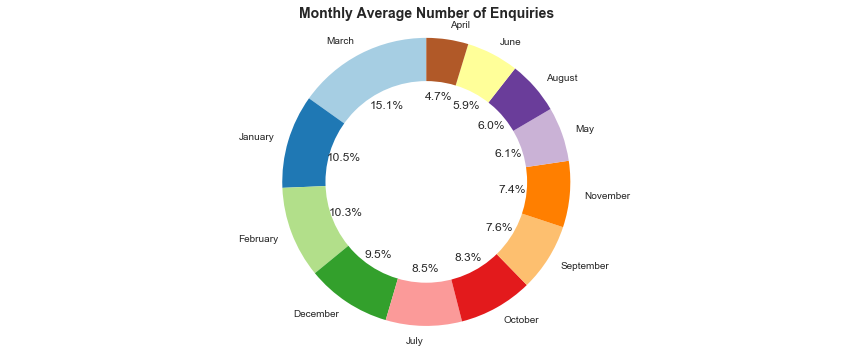

In [ ]:
sns.set_palette("Paired", 12)

fig3, ax3 = plt.subplots()
ax3.pie(high_month1['Percentage'], labels=high_month1.index, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')
ax3.set_title("Monthly Average Number of Enquiries", fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

Historically, March is the month with the highest average numbers of enquiries. This could be because of 2019's outlier. Let's remove 2019 and see if it still rings true.

In [ ]:
high_month = dat_month.loc['2012':'2018'].groupby('month').mean().sort_values(by='enquiry_count', ascending=False)

In [ ]:
high_month['Percentage'] = (high_month['enquiry_count']/high_month['enquiry_count'].sum())*100

In [ ]:
high_month.head()

,enquiry_count,Percentage
month,,
December,23.428571,11.439200
July,21.000000,10.253429
October,20.428571,9.974425
September,18.714286,9.137410
November,18.285714,8.928156


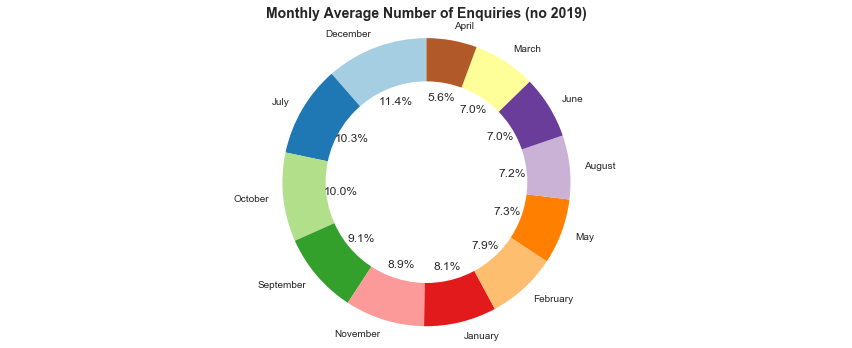

In [ ]:
sns.set_palette("Paired", 12)

fig3, ax3 = plt.subplots()
ax3.pie(high_month['Percentage'], labels=high_month.index, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')
ax3.set_title("Monthly Average Number of Enquiries (no 2019)", fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

After removing 2019, December becomes the month with the largest number of enquiries.

In [ ]:
dat_day = data_econet[['enquiry_count']].resample('D').sum()
dat_day.head()

,enquiry_count
created_at,
2012-02-01,7
2012-02-02,0
2012-02-03,1
2012-02-04,0
2012-02-05,0


In [ ]:
dat_day['day'] = dat_day.index.weekday_name
dat_day.head()

,enquiry_count,day
created_at,,
2012-02-01,7,Wednesday
2012-02-02,0,Thursday
2012-02-03,1,Friday
2012-02-04,0,Saturday
2012-02-05,0,Sunday


In [ ]:
dat_day.groupby('day').mean().sort_values(by='enquiry_count', ascending=False).head()

,enquiry_count
day,
Thursday,0.841823
Wednesday,0.780161
Monday,0.769437
Tuesday,0.718499
Friday,0.667560


Let's remove the outlier year again and see if our data changes.

In [ ]:
dat_day.loc['2012':'2018'].groupby('day').mean().sort_values(by='enquiry_count', ascending=False).head()

,enquiry_count
day,
Thursday,0.747922
Wednesday,0.700831
Monday,0.617729
Friday,0.565097
Tuesday,0.555556


Thursday remains the day with the highest average number of enquiries.

#### **Enquiry drivers**

1. According to the 2014 Econet Integrated Annual Report, Econet introduced new products into the market:
    -  Whatsapp bundles,
    -  4G LTE.
    
 Since this was the maiden entry of these products/services, it can be expected that there be issues with both and hence the corresponding enquiries on twitter.

2. To start of with service, Econet introduced **27 new** products in 2015. The common criticism to Econet has always been that they have way too many products and this compromises their service delivery. The old saying goes 'a jack of all trades is a master of none'. As far as the data enquiries go, potraz notes in its reports that there was a 12% increase in mobile data subscriptions from 2014 to 2015. And with Econet making up almost 80% of mobile data usage, it can be argued that most of those subscriptions belong to them. Even more interesting is the granular increase of mobile data subcriptions in the form of LTE. **LTE increased a mammoth 39,322%** from 2014 to 2015. What this means is that there was a large new customer base using Econet's new data service. This could explain the quadrupling of the data enquiries.

3. There was a sharp dive in service complaints from 2015 to 2016. This is in line with Econet's 2016 report where they document an increase of 16% (from 32% to 48%) when it comes to their **Net Promoter Score**, a metric presumably used to measure quality of service. However, I cannot find information that explains the rise in ecocash enquiries.

4. Data, ecocash, service and network spike almost exponentially in 2017. Let's do a wordcloud to get an idea of what constitutes these complaints.

In [ ]:
dat_data = data_econet[data_econet['tidy_tweet'].str.contains('data')].loc['2017']

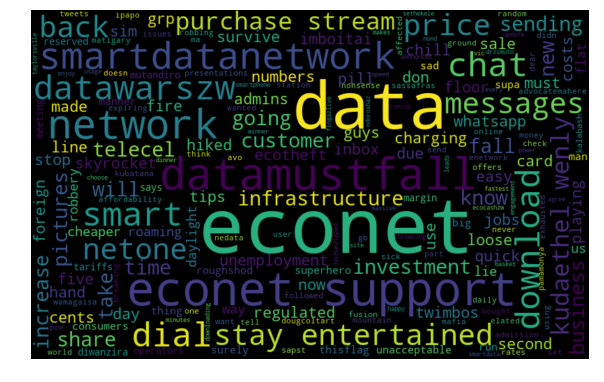

In [ ]:
all_words = ' '.join([text for text in dat_data['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The wordcloud shows that one of the most frequent hashtags is #datamustfall. This leads us to believe that customers were complaining that the price of data is too high.

In [ ]:
dat_data2 = data_econet[data_econet['tidy_tweet'].str.contains('data')].loc['2018']

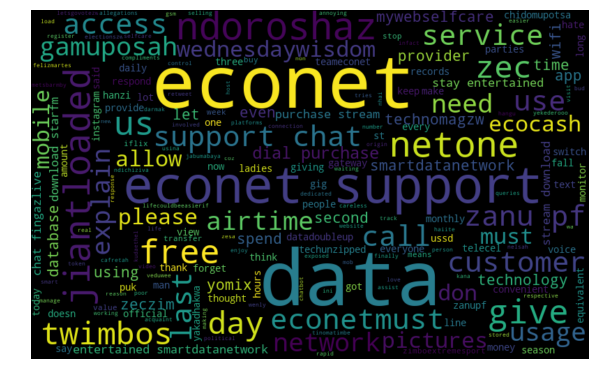

In [ ]:
all_words = ' '.join([text for text in dat_data2['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

There doesn't seem to be any obvious culprits, just noise. However, there are a lot of tweets directed to 'econet_support'. Let's see what they look like before we make a decision.

In [ ]:
dat_data3 = dat_data2[dat_data2['tidy_tweet'].str.contains('econet support', regex=True)]

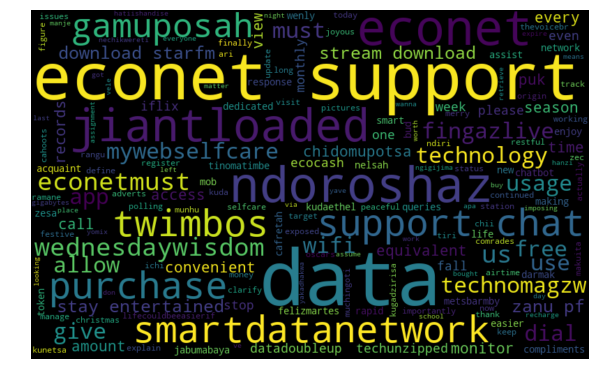

In [ ]:
all_words = ' '.join([text for text in dat_data3['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Still  nothing substantial. Let's narrow it down to the months that peak.

In [ ]:
dat_data4 = dat_data2[dat_data2['tidy_tweet'].str.contains('econet support', regex=True)].loc['2018-07']

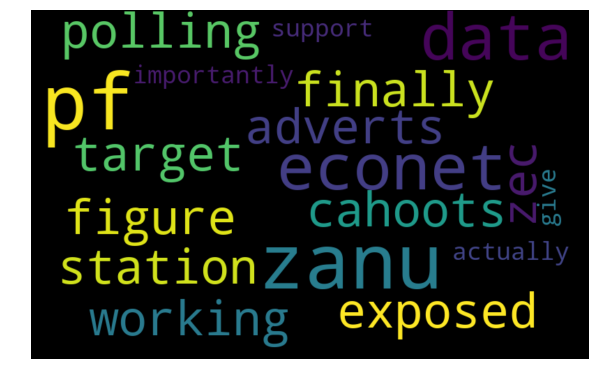

In [ ]:
all_words = ' '.join([text for text in dat_data4['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The picture is now much clearer. This spike in 'data' directed to econet and its customer support account was because of the 2018 election. July was a month before the election and this is when one of the parties that was contesting the electin, Zanu PF, sent people campaign messages. Customers queried Econet on how Zanu had gotten a hold of their 'data' without their permission. This is the main driver of the 2018 spike.

Since we have confirmed that this is noise, let's delete these rows.

In [ ]:
data_econet.drop(dat_data4.index, inplace=True)

Let's do the same exercies for ecocash.

In [ ]:
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)].loc['2017']

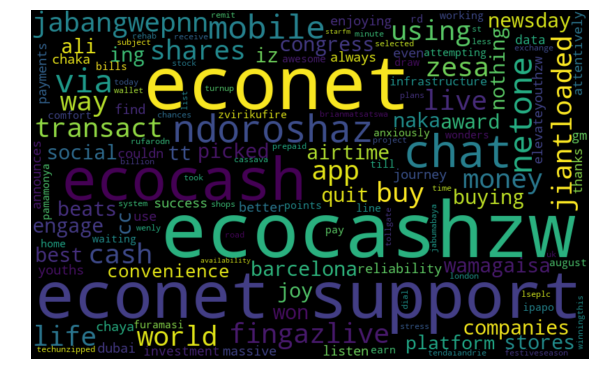

In [ ]:
all_words = ' '.join([text for text in dat_ecocash['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

There's nothing informative here. Too much noise. Let's filter it out.

In [ ]:
dat_ecocash = dat_ecocash[dat_ecocash['tidy_tweet'].str.contains('ecocashzw|econet support', regex=True)].loc['2017']

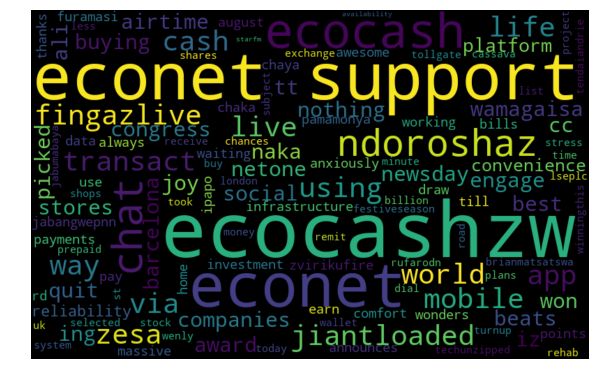

In [ ]:
all_words = ' '.join([text for text in dat_ecocash['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

It's safe to attribute this spike to mostly noise since there doesn't seem to be any significant issues presented by the wordcloud.

In [ ]:
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)].loc['2018']

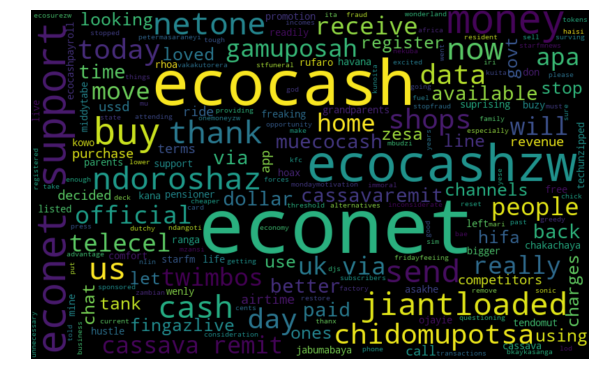

In [ ]:
all_words = ' '.join([text for text in dat_ecocash['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
dat_ecocash = dat_ecocash[dat_ecocash['tidy_tweet'].str.contains('ecocashzw|econet support', regex=True)].loc['2018']

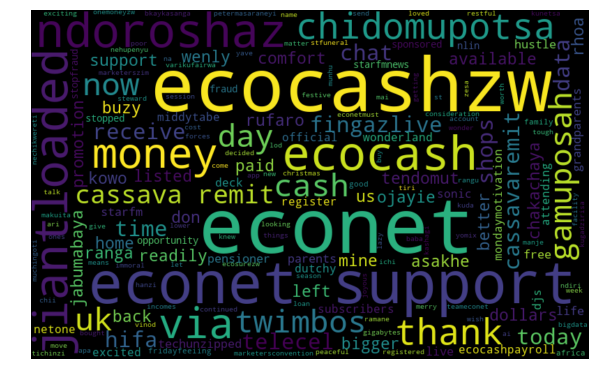

In [ ]:
all_words = ' '.join([text for text in dat_ecocash['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
dat_ecocash

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2018-02-19 06:55:56,45,2,36,Just paid mine in the comfort of my home @ojay...,nond2424,just paid mine in the comfort of my home ojay...,"['just', 'paid', 'mine', 'in', 'the', 'comfort...",e,True,pos,1
2018-03-19 12:38:25,20,0,13,US Dollars are readily available for cash out ...,TatendaDaemanie,us dollars are readily available for cash out ...,"['us', 'dollars', 'are', 'readily', 'available...",e,True,neutral,1
2018-04-09 06:29:23,24,0,20,"The #Chakachaya promotion is back, and this ti...",buzy263,the #chakachaya promotion is back and this ti...,"['the', '#chakachaya', 'promotion', 'is', 'bac...",e,True,neg,1
2018-04-13 05:54:01,34,0,36,Receive money from the Uk via cassava remit an...,ojayie12,receive money from the uk via cassava remit an...,"['receive', 'money', 'from', 'the', 'uk', 'via...",e,True,neutral,1
2018-04-16 07:11:36,19,1,21,Your pensioner parents/grandparents can now li...,buzy263,your pensioner parents grandparents can now li...,"['your', 'pensioner', 'parents', 'grandparents...",e,True,neutral,1
2018-05-03 08:14:41,13,5,13,"Netone, Telecel subscribers can now register f...",sharontawuya1,netone telecel subscribers can now register f...,"['netone', 'telecel', 'subscribers', 'can', 'n...",e,True,neutral,1
2018-05-05 10:27:55,27,0,15,Today I am excited to be attending #HIFA2018 @...,abbeyndooka,today i am excited to be attending #hifa ...,"['today', 'i', 'am', 'excited', 'to', 'be', 'a...",e,True,pos,1
2018-05-11 09:36:27,18,1,18,"Fraud can be stopped, but it is all up to YOU....",buzy263,fraud can be stopped but it is all up to you ...,"['fraud', 'can', 'be', 'stopped', 'but', 'it',...",e,True,neg,1
2018-05-17 11:56:09,48,0,51,Its good for me and my family. Thank u @gamupo...,casy_mugowe,its good for me and my family thank u gamupo...,"['its', 'good', 'for', 'me', 'and', 'my', 'fam...",e,True,pos,1


In [ ]:
dat_ser = data_econet[data_econet['tidy_tweet'].str.contains('service')].loc['2017']

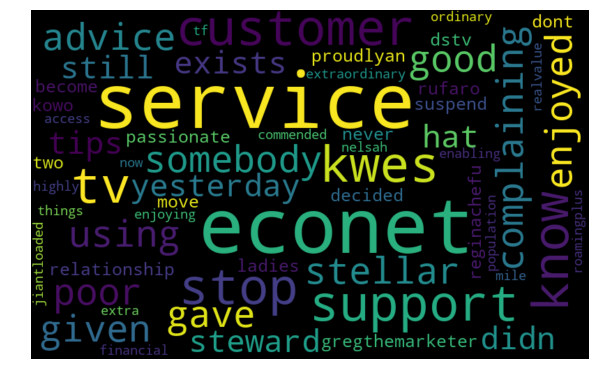

In [ ]:
all_words = ' '.join([text for text in dat_ser['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The wordcloud suggests that complaints about service range from kwese tv to steward bank.

In [ ]:
dat_ser = data_econet[data_econet['tidy_tweet'].str.contains('service')].loc['2018']

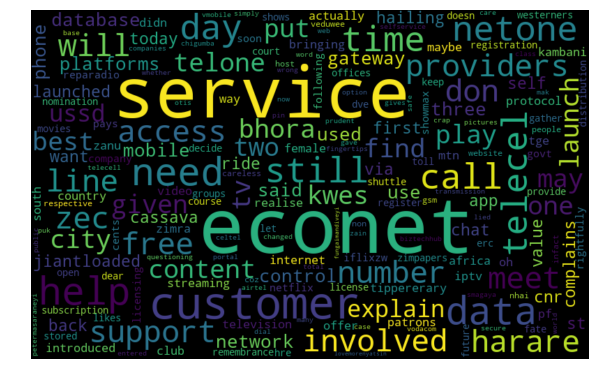

In [ ]:
all_words = ' '.join([text for text in dat_ser['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
dat_eco = data_econet[data_econet['tidy_tweet'].str.contains('ecocash')].loc['2019-03']

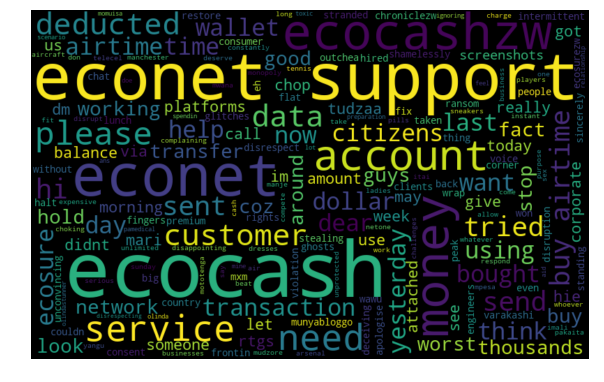

In [ ]:
all_words = ' '.join([text for text in dat_eco['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The wordcloud is quite revealing. Complaints are mostly about:
 - ecosure deductions that were made on customers' accounts without their conscent,
 - challenges with buying airtime and data using the service,
 - buying zesa with ecocash

Other complaints are about customer service, data and network quality. All these, including ecocash, peaked exponentially in March 2019. Levels that are unprecedented given the history from 2012.

In [ ]:
data_econet.to_csv('/Users/mac/Desktop/Data Science/Projects/EconetSentimentAnalysis-master/EconetSentimentAnalysis/data_econet.csv')

In [ ]:
data_comp.to_csv('/Users/mac/Desktop/Data Science/Projects/EconetSentimentAnalysis-master/EconetSentimentAnalysis/data_comp.csv')

In [ ]:
sns.set(rc={'figure.figsize':(12, 5)})

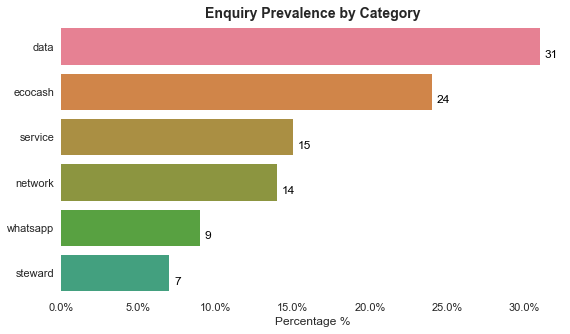

In [ ]:
sns.set_style("white")
sns.set_palette("husl", 12)

plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Percentage", y = "Word", orient="h")
ax.set_ylabel("")
ax.set_xlabel('Percentage %', fontsize=12)
ax.set_title("Enquiry Prevalence by Category", fontweight="bold", fontsize=14)
ax.tick_params(labelsize=11)
ax.xaxis.set_major_formatter(PercentFormatter())

for i, v in enumerate(d['Percentage']):
    ax.text(v + 0.3, i + .25, str(v), color='black')

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
sns.set_palette("husl")
plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
def create_pareto_chart(df, by_variable, quant_variable):
    sns.set_style("white")
    sns.set_palette("husl")

    df["cumpercentage"] = quant_variable.cumsum()/quant_variable.sum()*100

    fig, ax = plt.subplots()
    ax = sns.barplot(data=df, x= by_variable, y = quant_variable)
    ax2 = ax.twinx()
    ax2.plot(df[by_variable], df["cumpercentage"], marker="o", color="orange")
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y")
    ax2.tick_params(axis="y")
    plt.show()

In [ ]:
d[]

,Word,Count,Percentage
2,data,185,31
1,ecocash,142,24
0,service,92,15
3,network,88,14
4,whatsapp,54,9
5,steward,40,7


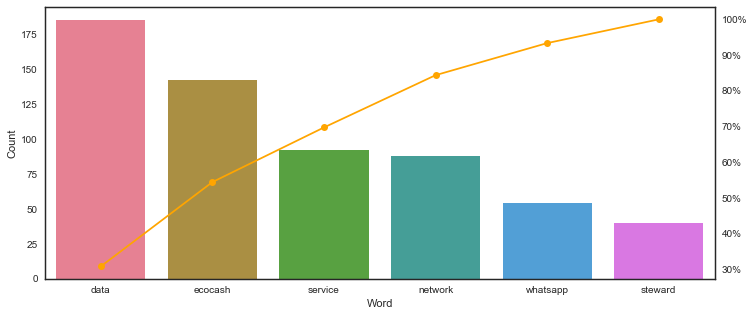

In [ ]:
create_pareto_chart(d, "Word", d["Count"])

In [ ]:
data.shape

(2610, 11)

In [ ]:
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image

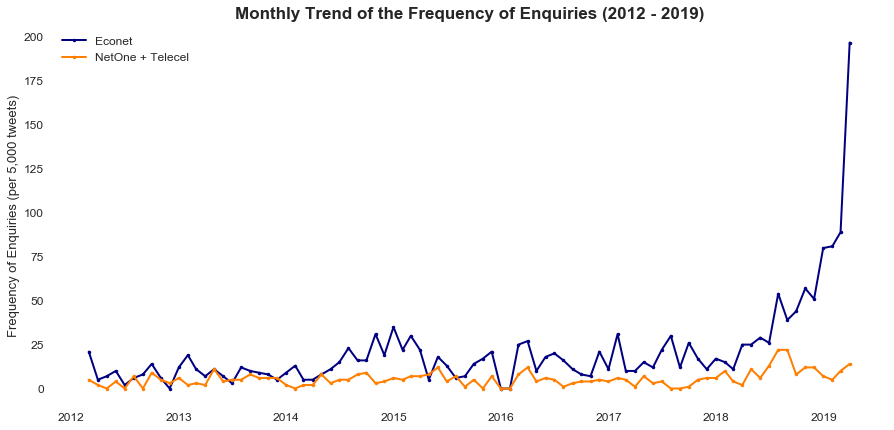

In [ ]:
sns.set_style("white")

fig1, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(data_econet['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, color='navy', label='Econet')
ax1.set_ylabel("Frequency of Enquiries (per 5,000 tweets)", fontsize=13)
ax1.set_title("Monthly Trend of the Frequency of Enquiries (2012 - 2019)", fontsize=17, fontweight="bold")

ax1.plot(data_comp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, color='#FF7F00', label='NetOne + Telecel')
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax1)



In [ ]:
dat_14_18 = data_econet[['enquiry_count']].resample("Y", convention='end').sum()
dat_14_18

,enquiry_count
created_at,
2012-12-31,91
2013-12-31,111
2014-12-31,197
2015-12-31,175
2016-12-31,174
2017-12-31,213
2018-12-31,456
2019-12-31,367


In [ ]:
dat_14_18 = dat_14_18.loc['2012':'2018']

In [ ]:
dat_14_18

,enquiry_count
created_at,
2012-12-31,91
2013-12-31,111
2014-12-31,197
2015-12-31,175
2016-12-31,174
2017-12-31,213
2018-12-31,456


In [ ]:
ems = {'2012': 63.5, '2013': 64, '2014': 54.7, '2015': 52.5, '2016': 49.4, '2017': 53.1, '2018': 66.3}
ep = {'2012': 4, '2013': 7, '2014': 9, '2015': 13, '2016': 17, '2017': 18, '2018': 19}


In [ ]:
dat_14_18['market share'] = list(ems.values())
dat_14_18['number of products'] = list(ep.values())

In [ ]:
dat_14_18

,enquiry_count,market share,number of products
created_at,,,
2012-12-31,91,63.5,4
2013-12-31,111,64.0,7
2014-12-31,197,54.7,9
2015-12-31,175,52.5,13
2016-12-31,174,49.4,17
2017-12-31,213,53.1,18
2018-12-31,456,66.3,19


In [ ]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
#a, b = best_fit(X, Y)

# plot points and fit line
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.scatter(X, Y)
#yfit = [a + b * xi for xi in X]
#plt.plot(X, yfit)
#plt.grid()
#plt.show()

best fit line:
y = -72.69 + 4.77x


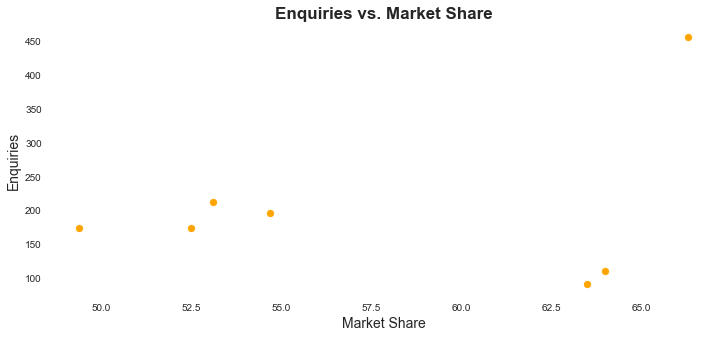

In [ ]:
a, b = best_fit(list(dat_14_18['market share']), list(dat_14_18['enquiry_count']))

plt.scatter(dat_14_18['market share'], dat_14_18['enquiry_count'], c='orange')
yfit = [a + b * xi for xi in list(dat_14_18['market share'])]
#plt.plot(list(dat_14_18['market share']), yfit, c='green')
plt.xlabel("Market Share", fontsize=14)
plt.ylabel("Enquiries", fontsize=14)
plt.title("Enquiries vs. Market Share", fontsize=17, fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
dat_14_18.corr()

,enquiry_count,market share,number of products
enquiry_count,1.000000,0.267878,0.714566
market share,0.267878,1.000000,-0.347602
number of products,0.714566,-0.347602,1.000000


best fit line:
y = 20.91 + 14.61x


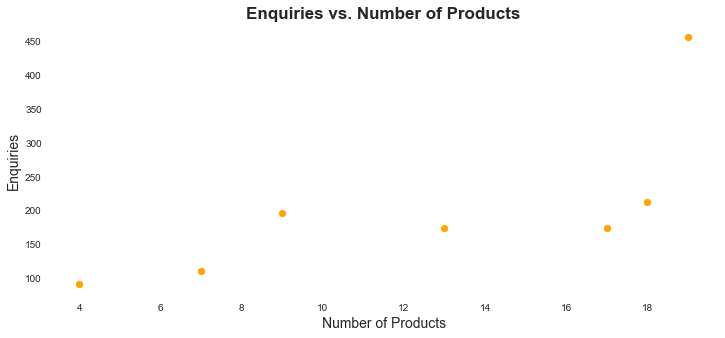

In [ ]:
a, b = best_fit(list(dat_14_18['number of products']), list(dat_14_18['enquiry_count']))

plt.scatter(dat_14_18['number of products'], dat_14_18['enquiry_count'], c='orange')
yfit = [a + b * xi for xi in list(dat_14_18['number of products'])]
#plt.plot(list(dat_14_18['number of products']), yfit, c='green')
plt.xlabel("Number of Products", fontsize=14)
plt.ylabel("Enquiries", fontsize=14)
plt.title("Enquiries vs. Number of Products", fontsize=17, fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
print("Econet: ", data_econet.shape[0])
print("Competition: ", data_comp.shape[0])

Econet:  1784
Competition:  477


In [ ]:
(477/(477+1784))*100

21.0968597965502

In [ ]:
data_econet.resample()

In [ ]:
me = data_econet[['enquiry_count']].resample('Y').sum()

In [ ]:
me

,enquiry_count
created_at,
2012-12-31,91
2013-12-31,111
2014-12-31,197
2015-12-31,175
2016-12-31,174
2017-12-31,213
2018-12-31,456
2019-12-31,367


In [ ]:
me['Percentage'] = (me['enquiry_count']/me['enquiry_count'].sum())*100

In [ ]:
me

,enquiry_count,Percentage
created_at,,
2012-12-31,91,5.100897
2013-12-31,111,6.221973
2014-12-31,197,11.042601
2015-12-31,175,9.809417
2016-12-31,174,9.753363
2017-12-31,213,11.939462
2018-12-31,456,25.560538
2019-12-31,367,20.571749


In [ ]:
# Bokeh libraries
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

# Prepare the data

# Determine where the visualization will be rendered
output_notebook()  # Render inline in a Jupyter Notebook

# Set up the figure(s)
fig = figure()  # Instantiate a figure() object

# Connect to and draw the data

# Organize the layout

# Preview and save
show(fig)  # See what I made, and save if I like it

Loading BokehJS ...

In [ ]:
data_econet.shape

(1784, 11)

In [ ]:
data_comp.shape

(477, 11)

In [ ]:
b = pd.DataFrame({'Econet': [1784], 'Netone+Telecel': [477]})

In [ ]:
b

,Econet,Netone+Telecel
0,1784,477


In [ ]:
477/2261

0.210968597965502

In [ ]:
ax7 = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)